In [108]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from  sklearn.cluster import KMeans
from skimage.color import deltaE_cie76,rgb2lab
import os
import cv2
#importing all required pakages and modules

%matplotlib inline 
#above inline stmt is necessary since we are using python notebook not IDLE
#it'll give o/p graph just below the cell where show() function is used

Type of input given is <class 'numpy.ndarray'>
Shape: (417, 626, 3)


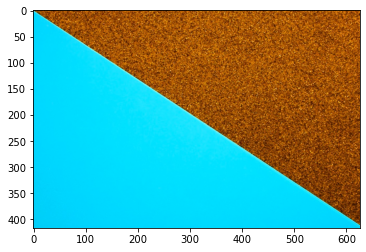

In [109]:
img=cv2.imread("D:\TanProj\sample_img.jpg") 
#imread() is used for reading any image as specified as " 'address_of_img' "

print("Type of input given is {}" .format(type(img)))
print("Shape: {}".format(img.shape))

plt.imshow(img)  
#imshow() gives the plotted o/p of the sample_img 
##O/P

#Shape(par1,par2,par3): par1,par2 : specifies pixel of the image.
#                       par3 : specifies combo of 3 colors RED,GREEN,BLUE

In [110]:
#So we would have got the image in form of graph but the colors would be kinda different.

# Since by default in reads colors in sequence of BLUE,GREEN,RED i.e. (BGR)

# So now we'll convert in sequence of RED,GREEN,BLUE i.e. (RGB)

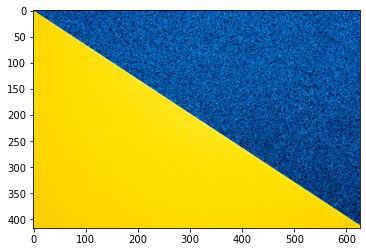

In [111]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# cvtColor(par1,par2) is used for convert img from BGR to RGB seq
#  par1 : specifies the image to be converted
#  par2 :method to be specified for conversion of any seq 

plt.imshow(img)

##O/P

#We retain our original image colors 

In [112]:
#Now we'll identify the colors from the image in form of HEX code
#Then we'll convert those obtained HEX codes in form of a chart for visualization of colors used in the image

In [113]:
#Now we define a method for RGB to HEX conversion

In [114]:
def rgb2hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
                                       
#convert 0..255(RGB val0) to 00...ff(HEX val)
#reading color which is in RGB val (format) then returning in form of HEX val "#{:02x}" 

In [115]:
#Now we define a method for reading an image 
#then converting it from BGR to RGB colored image 

In [116]:
def get_img(image_path):
    img=cv2.imread(image_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img
#as previously shown above same process is followed and a function is been created

In [117]:
#Now we define a method with 3 parameters for extracting the colors that are mostly visible
#then display them in form a pie chart according to the ratio of occurance
# par1: image that is to be extracted
# par2: total colors we want to extract
# par3: a boolean val whether we want to show pie-chart or not

In [118]:
def get_colors(image,no_of_colors,show_chart):\
    
    updated_img=cv2.resize(image,(1200,900),interpolation=cv2.INTER_AREA)
#resize func. is been used to reduce the image which in turn would
#reduce pixels of the image for lesser time complexity in performing the task

    updated_img=updated_img.reshape(updated_img.shape[0]*updated_img.shape[1],3)
#Numpy's reshape func. is used for reshapeing image data in form of 2D 

    clf=KMeans(n_clusters=no_of_colors)
    lb=clf.fit_predict(updated_img)
#We use KMeans Algo to create clusters based on our no of colors that are mostly present on image
#then we fit and predict the colors and store prediction in variable 'lb' used above

    counts=Counter(lb)
    centroid_colors=clf.cluster_centers_
#we count the number of prediction 
#then to find appropiate color percentage we use clf.cluster_centers_
     
    ord_colors=[centroid_colors[i] for i in counts.keys()]
#we get colors in ordered form in array by iterating through the key vals of counts
#each val is getting divided by 255 and getting stored in ord_colors

    hex_colors=[rgb2hex(ord_colors[i]) for i in counts.keys()]
    rgb_colors=[ord_colors[i] for i in counts.keys()]
    
##Now we get HEX n RGB colors in respective arrays
# Here each val is getting multiplied by 255 and getting stored in original form
# to depict them in our pie-chart'''
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors  
#if par3 i.e. show_chart is True, pie-chart gets plotted in form below:
# count.values() depicts portion , hex_colors are our labels for each portion ,colors are as ord_colors
# then rgb_colors are returned whose utility would be shown afterwards 

In [119]:
#Now We are SET, Just call the Above Method & we get our Pie-Chart for top 3 colors of our img : 

[array([254.06881616, 220.80281804,   4.52593878]),
 array([  2.94063097,  62.30794639, 133.32909853]),
 array([ 14.26826193, 101.38164024, 180.82395439])]

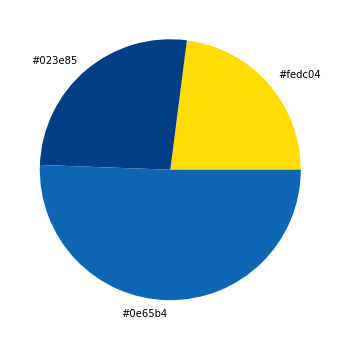

In [120]:
get_colors(get_img('D:\TanProj\sample_img.jpg'),3,True)

In [121]:
#Now our Task Is to Filter Images based on color selected by End-User
  #    i.e. commonly seen in most of the Search Engines

In [122]:
#First of all we'll filter the images based on the color required, 
 #   below we would supply RGB vals for most basic colors RED, GREEN, BLUE 

In [123]:
Directory='D:\TanProj\Images'
colors={'Yellow':[255,255,0],
        'Blue':[0,0,150],
        'Red':[255,0,0]}
imgs=[]

for file in os.listdir(Directory):
    if not file.startswith('.'):
        imgs.append(get_img(os.path.join(Directory,file)))
        
#Our Images are in folder address mentioned above for var Directory then each
#image val is read n stored in array imgs respectively

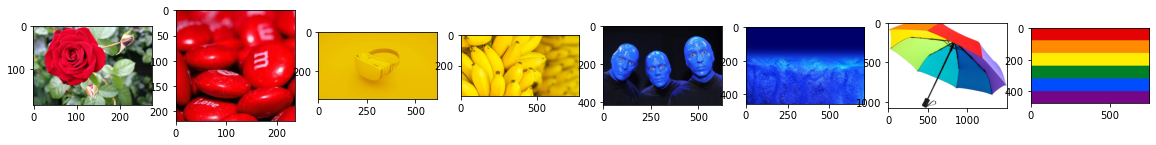

In [124]:
plt.figure(figsize=(20,10))
for i in range(len(imgs)):
    plt.subplot(1,len(imgs),i+1)
    plt.imshow(imgs[i])

#O/P :
#  displays all images in 1 row 
#  along with graphical plotting of all images respectively  

In [125]:
#Now we define a method that matches all images with color given
#     then filters them accordingly 

In [126]:
def matching(image,color,threshold=60,no_of_colors=10):
    
    image_colors=get_colors(image,no_of_colors,False)
    selected_color=rgb2lab(np.uint8(np.asarray([[color]])))
    
#Firstly we extract colors from  images by using get_colors() 
#Then we convert selected color to a format we can compare by using rgb2lab()
    
    select_image=False
    for i in range(no_of_colors):
        
        curr_color= rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff= deltaE_cie76(selected_color,curr_color)
        if diff<threshold:
            select_image=True
            
#So above we iterate through all colors converting them to lab val 
#then finding difference b.w. then given and obtained color 
#if difference is below threshold then its selected else moved on
#since there are many shades for a particular color light, dark, shiny, etc. 

    return select_image

In [127]:
#Now we are defining method for showing the selected images as per color
 #     i.e showing all filtered images by iterating all images
  #      then showing them by using imshow() as we used previously

In [128]:
def show_filtered_images(images,color,threshold,colors_to_match):
    k=1
    for i in range(len(images)):
        
        selected=matching(images[i],color,threshold,colors_to_match)
        
        if selected:
            plt.subplot(1,5,k)
            plt.imshow(images[i])
            k+=1
    

In [129]:
#Now simply call the above method by mentioning the choice of color
 #   in place of the par2 i.e. 'color' like--> "colors['GREEN']" 
  #    and mentioning threshold as 60 and total colors 
   #    to be extracted from images as 5 or 6 each 

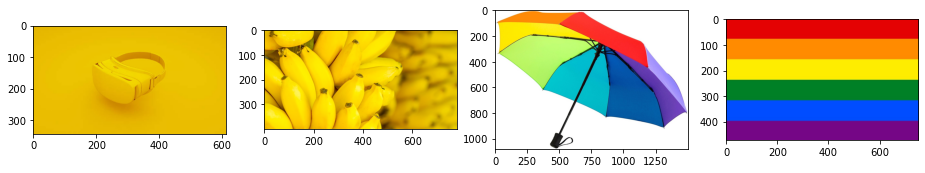

In [130]:
plt.figure(figsize=(20,10))
show_filtered_images(imgs,colors['Yellow'],60,5)

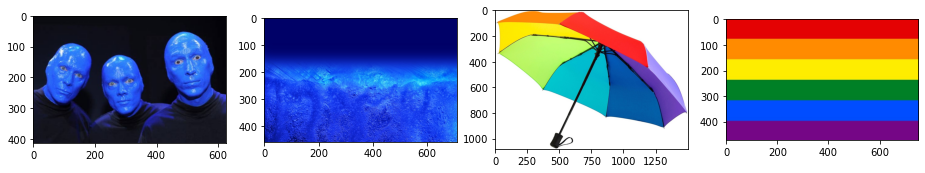

In [131]:
plt.figure(figsize=(20,10))
show_filtered_images(imgs,colors['Blue'],60,6)

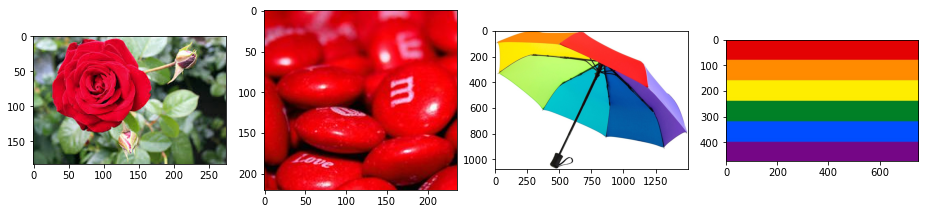

In [132]:
plt.figure(figsize=(20,10))
show_filtered_images(imgs,colors['Red'],60,6)